<a href="https://colab.research.google.com/github/Stephane-Masamba/Team_4_CPT_ML-Classification/blob/Mikael/Mikael_Daniels_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from numpy import arange
import re
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from google.colab import drive

In [85]:
train = pd.read_csv('train (1).csv')
print(train.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


In [86]:
test = pd.read_csv('test (1).csv')
print(test.head())

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


In [87]:
sample = pd.read_csv('sample_submission.csv')
print(sample.head())

   tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          1


In [88]:
i = 0
for tweet in train['message']:
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+', 'LINK', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = tweet.lstrip()
  tweet = tweet.rstrip()
  tweet = tweet.replace('  ', ' ')
  train.loc[i, 'message'] = tweet
  i += 1

In [89]:
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
...,...,...,...
15814,1,rt ezlusztig they took down the material on gl...,22001
15815,2,rt washingtonpost how climate change could be ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt sara8smiles hey liberals the climate change...,819732


In [90]:
j = 0
for message in test['message']:
  message = message.lower()
  message = re.sub(r'http\S+', 'LINK', message)
  message = re.sub(r'[^\w\s]', '', message)
  message = message.lstrip()
  message = message.rstrip()
  message = message.replace('  ', ' ')
  test.loc[j, 'message'] = message
  j += 1

In [91]:
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos \nputin go...,476263
4,rt fakewillmoore female orgasms cause global w...,872928
...,...,...
10541,rt brittanybohrer brb writing a poem about cli...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt loop_vanuatu pacific countries positive abo...,78329
10544,rt xanria_00018 youre so hot you must be the c...,867455


In [ ]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [92]:
X_train = train['message']
X_train

0        polyscimajor epa chief doesnt think carbon dio...
1        its not like we lack evidence of anthropogenic...
2        rt rawstory researchers say we have three year...
3        todayinmaker wired 2016 was a pivotal year in ...
4        rt soynoviodetodas its 2016 and a racist sexis...
                               ...                        
15814    rt ezlusztig they took down the material on gl...
15815    rt washingtonpost how climate change could be ...
15816    notiven rt nytimesworld what does trump actual...
15817    rt sara8smiles hey liberals the climate change...
15818    rt chet_cannon kurteichenwalds climate change ...
Name: message, Length: 15819, dtype: object

In [93]:
y_train = train['sentiment']
y_train

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tf_vect = TfidfVectorizer(ngram_range=(1, 2))

In [96]:
X_train = tf_vect.fit_transform(X_train)

In [97]:
X_test = test['message']

In [98]:
X_test = tf_vect.transform(X_test)

In [99]:
def accuracy(model):
     features = train['message']
     target = train['sentiment']

     train_scores = []
     test_scores = []

     tf_vect = TfidfVectorizer(ngram_range=(1, 2))

     folds = KFold(n_splits=5, shuffle=True)

     for train_index, test_index in folds.split(features):
          x_train, x_test = features.iloc[train_index], features.iloc[test_index]    
          y_train, y_test = target.iloc[train_index], target.iloc[test_index]

          x_train = tf_vect.fit_transform(x_train)
          x_test = tf_vect.transform(x_test)
     
          model.fit(x_train, y_train)
          train_predictions = model.predict(x_train)
          test_predictions = model.predict(x_test)

          train_score = accuracy_score(y_train, train_predictions)
          train_scores.append(train_score)

          test_score = accuracy_score(y_test, test_predictions)
          test_scores.append(test_score)

     avg_train_accuracy = np.mean(train_scores)
     avg_test_accuracy = np.mean(test_scores)

     return [avg_train_accuracy, avg_test_accuracy]

In [100]:
sv = SVC()

In [101]:
sv_accuracy = accuracy(sv)
sv_accuracy

[0.9809880640612662, 0.7307049189566627]

In [102]:
bernoulli = BernoulliNB()

In [103]:
bernoulli_accuracy = accuracy(bernoulli)
bernoulli_accuracy

[0.7548676062838502, 0.63290955433259]

In [104]:
mnb = MultinomialNB()

In [105]:
mnb_accuracy = accuracy(mnb)
mnb_accuracy

[0.7019723182224362, 0.6320253180241038]

In [106]:
sgd = SGDClassifier()

In [107]:
sgd_accuracy = accuracy(sgd)
sgd_accuracy

[0.9598426102922997, 0.7519442966698149]

In [108]:
rand_forest = RandomForestClassifier()

In [109]:
rand_forest_accuracy = accuracy(rand_forest)
rand_forest_accuracy

[0.9991307883383842, 0.7039618566924054]

In [110]:
knn = KNeighborsClassifier()

In [111]:
knn_accuracy = accuracy(knn)
knn_accuracy

[0.7707661820230658, 0.6674897169508536]

In [112]:
grad_booster = GradientBoostingClassifier()

In [113]:
grad_booster_accuracy = accuracy(grad_booster)
grad_booster_accuracy

[0.7303559328298753, 0.6809536066713218]

In [114]:
extra_trees = ExtraTreesClassifier()

In [115]:
extra_trees_accuracy = accuracy(extra_trees)
extra_trees_accuracy

[0.9992256137672882, 0.7231805168243914]

In [116]:
bagging = BaggingClassifier()

In [117]:
bagging_accuracy = accuracy(bagging)
bagging_accuracy

[0.9790442058300087, 0.6376516877150588]

In [118]:
dec_tree = DecisionTreeClassifier()

In [119]:
dec_tree_accuracy = accuracy(dec_tree)
dec_tree_accuracy

[0.9992256175135026, 0.5710223655069899]

In [120]:
linear_sv = LinearSVC()

In [121]:
linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy

[0.9977874695120581, 0.7613000028378057]

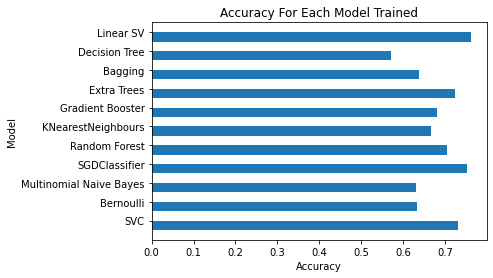

In [126]:
cols = ['SVC', 'Bernoulli', 'Multinomial Naive Bayes', 'SGDClassifier', 'Random Forest', 'KNearestNeighbours', 'Gradient Booster', 'Extra Trees', 'Bagging', 'Decision Tree', 'Linear SV']
bar_widths = [sv_accuracy[1], bernoulli_accuracy[1], mnb_accuracy[1], sgd_accuracy[1], rand_forest_accuracy[1], knn_accuracy[1], grad_booster_accuracy[1], extra_trees_accuracy[1], bagging_accuracy[1], dec_tree_accuracy[1], linear_sv_accuracy[1]]
bar_positions = arange(11) + 0.75
tick_positions = range(1,12)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols)

ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy For Each Model Trained')

plt.show()

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
gs_clf = GridSearchCV(SVC(), tuned_parameters)

In [ ]:
accuracy(gs_clf)

In [ ]:
linear_svc = LinearSVC()

In [ ]:
linear_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predictions = linear_svc.predict(X_test)

In [ ]:
test['sentiment'] = predictions
test

,message,tweetid,sentiment
0,europe will now be looking to china to make su...,169760,1
1,combine this with the polling of staffers re c...,35326,1
2,the scary unimpeachable evidence that climate ...,224985,1
3,karoli morgfair osborneink dailykos \nputin go...,476263,1
4,rt fakewillmoore female orgasms cause global w...,872928,0
...,...,...,...
10541,rt brittanybohrer brb writing a poem about cli...,895714,1
10542,2016 the year climate change came home during ...,875167,1
10543,rt loop_vanuatu pacific countries positive abo...,78329,2
10544,rt xanria_00018 youre so hot you must be the c...,867455,0


In [ ]:
submission = test[['tweetid', 'sentiment']]
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0
